In [124]:
from sympy import * 
from spb import *

import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots



smp.init_printing(pretty_print=True)

# following mathcube tutorial from [medium](https://medium.com/@mathcube7/the-laplace-equation-solved-analytically-with-python-c788cb009773)

- 2D laplace, div grad u(x,y) = 0 
- semi infinite recatnagular domain: 0 <= x <= a, 0 <= y
- BCs: 
  - u0 at y=0, 0 as y -> oo
  - 0 at x=0, 0 at x=a
- solution approach: seperation ansatz


In [30]:
# define variables
x, y = symbols("x, y")
u = Function("u")
X, Y = symbols("X, Y", cls=Function) # TODO why the difference here?

u(x,y)

In [39]:
# convenience function to apply opperation to both sides of an equation 

def apply(eq, func, *args):
    return Eq(
        func(eq.lhs, *args),
        func(eq.rhs, *args)
    )

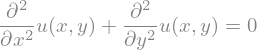

In [56]:
# formulate Laplace equation 

EQ1 = Eq(
    diff(u(x,y), (x, 2)) + diff(u(x,y), (y,2)), 
    0
)
EQ1

### initial seperation 

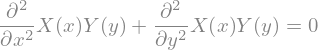

In [57]:
# substitue seperation ansatz
EQ1.subs(u(x,y), X(x)*Y(y))

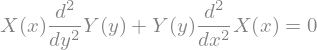

In [58]:
_.doit()

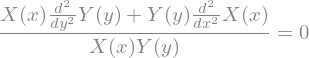

In [59]:
# divide bt the seperation ansatz 
apply(_, Mul, 1/ (X(x)*Y(y)))

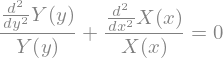

In [60]:
expand(_)

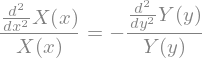

In [61]:
# put on different sides 
apply(_, Add, -_.lhs.args[1])

In [62]:
EQ2 = _

### solving for X(x)

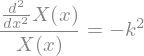

In [64]:
# each side must equal some negative constant # TODO => read in PDE book about this.. 
k = symbols("k")

Eq(EQ2.lhs, -k**2)

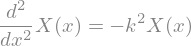

In [65]:
apply(_, Mul, X(x))

In [66]:
EQ3 = _

In [68]:
# this is the ODE of a harmonic oscillator #TODO, refresh on ODEs 
# can write down solution for X(x) immediately 

var("A, B")
Eq(X(x), A * sin(k*x) + B * cos(k*x))

#### boundary conditions on u(x)

##### bc_x1: u(x=0, y) = 0

In [69]:
_.subs(B, 0) # note => skipped a step -> didnt acually solve out 

In [70]:
EQ4 = _

##### bc_x2: u(x=a, y) = 0

In [71]:
var("a")

Eq(sin(k*a), 0) # NOTE: left out the A / didnt use the whole equation - why?

In [72]:
solve(_, k*a)

In [73]:
# 0, pi are possible values for k*a, but also all integrer multiples of pi 
var("n", integer=True)

Eq(k*a, n*pi)

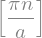

In [74]:
solve(_, k)

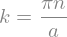

In [76]:
Eq(k, _[0])

In [77]:
EQ_k = _

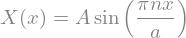

In [78]:
# now have a value for k, can eliminate from solution of x
EQ4.subs(k, _.rhs)

In [79]:
EQ5 = _

### solving for Y(y)

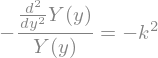

In [81]:
Eq(EQ2.rhs, -k**2)

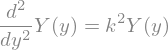

In [82]:
apply(_, Mul, -Y(y))

In [83]:
# above ode is the hyperbolic counterpart of the harmonic oscillator #TODO review this..
# again, can write down solution immediately 

var("C, D")
Eq(Y(y), C * exp(k*y) + D * exp(-k*y))

#### boundary conditions on u(y)

##### bc_y1: u(x, y->oo) = 0

In [84]:
# can discard the term with C based on this BC #TODO is there a way to automate this?

_.subs({C: 0})

In [92]:
EQ6=  _

### preliminary solution (one BC to go)

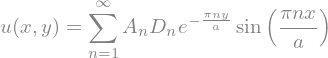

In [95]:
# constants in X(x) and Y(y) may depend on k and this n, so they need indices 

A_n, D_n = symbols("A_n, D_n")

Eq(
    u(x,y),
    Sum(
        EQ5.rhs * EQ6.rhs, 
        (n, 1, oo)
    ).subs({A: A_n, D: D_n, k:EQ_k.rhs})
)

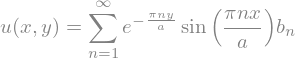

In [96]:
# the constants dont need to be seperated, bn = An * Dn

b = IndexedBase("b") #TODO what does this mean?

_.subs(A_n*D_n, b[n])

In [97]:
EQ7 = _

### bc_y2: u(x, y=0) = u0

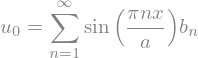

In [98]:
u0 = Symbol("u_0")

Eq(u0, EQ7.rhs.subs(y, 0))

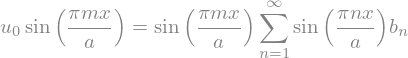

In [100]:
# sines are a set of orthogonal functions #TODO read into this..
# scalar product of 2 sin functions = pi integrated over the interval 0 - 2pi if the coefficients on their x values are the same 

var("m", integer=True, positive=True)
apply(_, Mul, sin(pi*m*x/a))

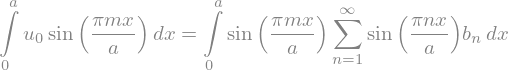

In [101]:
# integrate over x #TODO investigate Integral object vs integrate function 

apply(_, Integral, (x, 0, a))

In [102]:
EQ8 = _

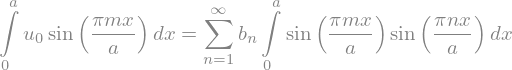

In [104]:
# rhs => swap integration and summation 

Eq(EQ8.lhs, 
    Sum(
        b[n] * 
        Integral(sin(pi*m*x/a) * sin(pi*n*x/a), (x, 0, a)),
        (n, 1, oo)
    )
)

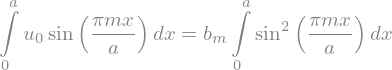

In [105]:
# due to orthogonality property => terms vanish except for when n = m 
Eq(_.lhs, _.rhs.args[0].subs(n, m))

In [106]:
EQ9 = _

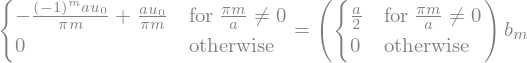

In [111]:
# evaluate the integrals 
EQ9.doit()

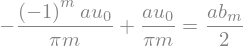

In [112]:
# m is positive so can simplify with refine 
apply(_, refine, Q.nonzero(pi*m/a))

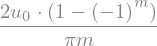

In [113]:
solve(_, b[m])[0]

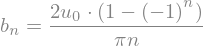

In [114]:
Eq(b[n], _.subs(m, n))

### final solution 

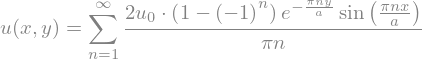

In [115]:
EQ7.replace(b[n], _.rhs)

In [116]:
SOL  = _ #type(SOL.rhs) # sympy.concrete.summations.Sum

### use solution to plot

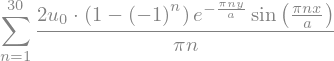

In [120]:
# can approximate the infinite sum by cutting off at some point 

Sum(SOL.rhs.args[0], (n, 1, 30))

In [121]:
SOL_APPROX = _.subs({u0: 100, a: 10})

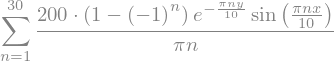

In [122]:
SOL_APPROX

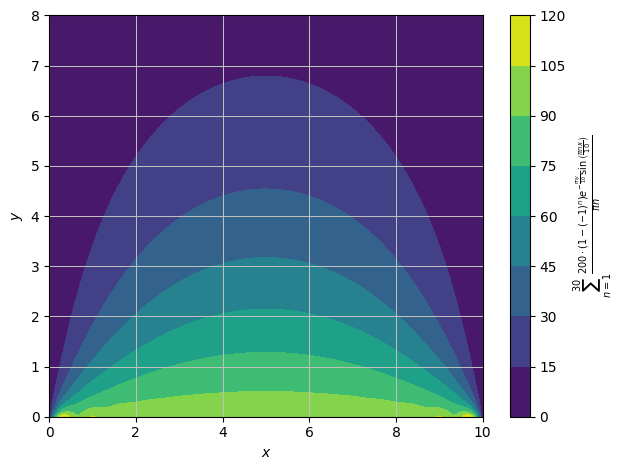

In [125]:
plot_contour(SOL_APPROX, (x, 0, 10), (y, 0, 8))